# Cyfrowe przetwarzanie sygnałów i obrazów 
**Jakub Fita** 259208 <br>
**Maksym Malicki** <br>
### Ćwiczenie 1.
Napisz skrypt w Pythonie/Matlabie umożliwiający wczytywanie i wizualizację badanych sygnałów. Program powinien umożliwiać obserwowanie wycinka
sygnału dla zadanego przedziału czasowego, skalowanie osi wykresów i ich opis oraz
zapis dowolnego wycinka sygnału do pliku o podanej nazwie.

Fragment kodu odpowiadający za importowanie wykorzystywanych bibliotek:

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import plotly.express as px
import scipy.signal as sig

Wczytywanie danych z pliku *ekg1.txt*

In [37]:
ekg1 = pd.read_csv('ekg_signals/ekg1.txt', names = ['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'k11', 'k12'], sep= ' ')

Przypisanie odpowiednich częstotliwości sygnału *[Hz]*.

In [38]:
fs_ekg1 = 1000 
fs_ekg100 = 360
fs_noise = 360

Wyznaczenie wartości które będą przedstawione na osi x wykresów oraz wyświetlenie 4 pierwszych rekordów.

In [39]:
ekg1['t'] = ekg1.index / fs_ekg1
ekg1 = ekg1.set_index('t')
ekg1.head(4)

k1   k2   k3   k4  k5   k6   k7   k8   k9  k10  k11  k12
t                                                               
0.000  106  335  228 -227 -59  291 -392  -45  443  372  908  395
0.001  106  335  228 -227 -59  291 -392  -45  443  372  908  395
0.002  106  325  219 -219 -60  284  492  837  239  372  908  405
0.003   86  306  219 -214 -55  274  487  832  240  404  179  -63

Kod generujący interaktywny wykres z możliwością przesuwania, przybliżania, oddalania oraz zapisywania wycinków.

In [40]:
ekg1_plot = px.line(ekg1)
ekg1_plot.update_traces(line = dict(width = 1))
ekg1_plot.update_xaxes(title_text = 't[s]')
ekg1_plot.update_yaxes(title_text = 'U[mV]')
ekg1_plot.update_layout(title_text = 'EKG1 interactive plot', title_font_size = 17, title_x = 0.5)
ekg1_plot.show()

Kod generujący osobne wykresy dla każdego z wczytanych odprowadzeń z pliku *ekg1.txt*.

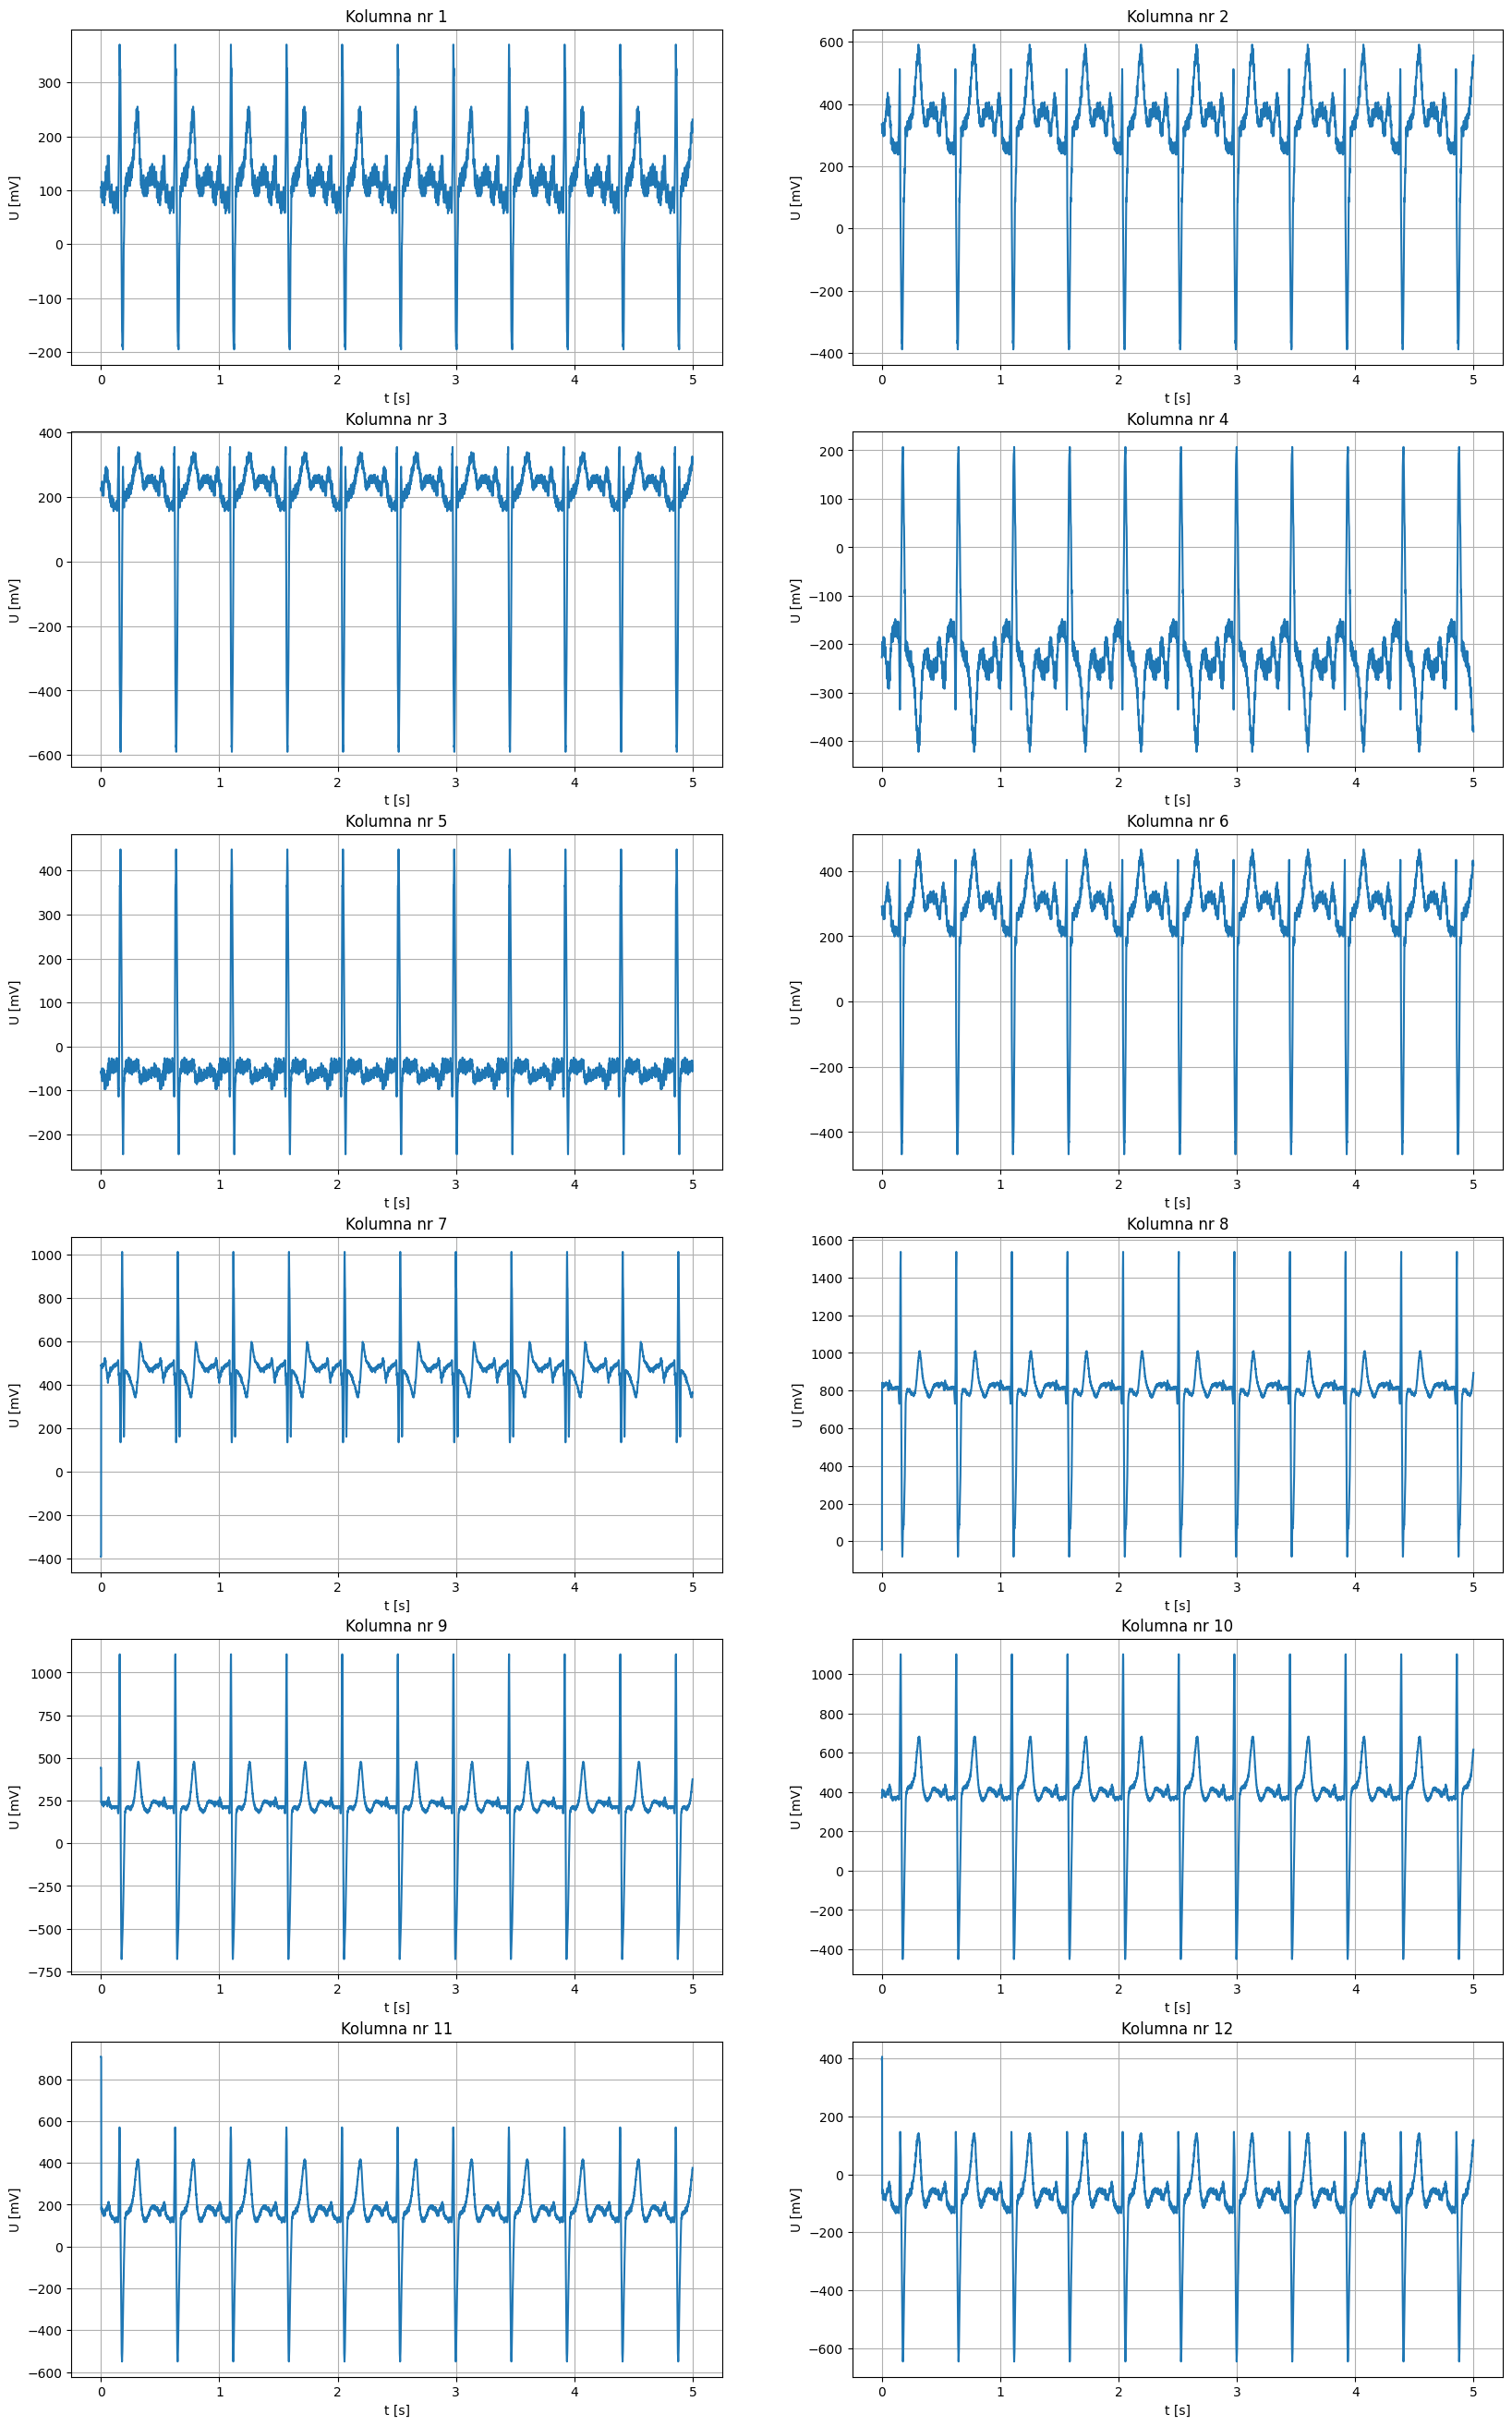

In [41]:
plot.figure(figsize=(20,33))
for i in range(1, 13):
    x = ekg1.index    
    y = ekg1[f'k{i}'] 
    plot.subplot(6, 2, i)  
    plot.plot(x, y)        
    plot.grid(axis='both') 
    plot.xlabel('t [s]')  
    plot.ylabel('U [mV]') 
    plot.title(f'Kolumna nr {i}') 

### Ćwiczenie 2.
Celem ćwiczenia jest praktyczne wypróbowanie funkcji numpy.fft i numpy.ifft do wyznaczania prostej i odwrotnej transformaty Fouriera [1, 3].
1. Wygeneruj ciąg próbek odpowiadający fali sinusoidalnej o częstotliwości 50 Hz i długości 65536.

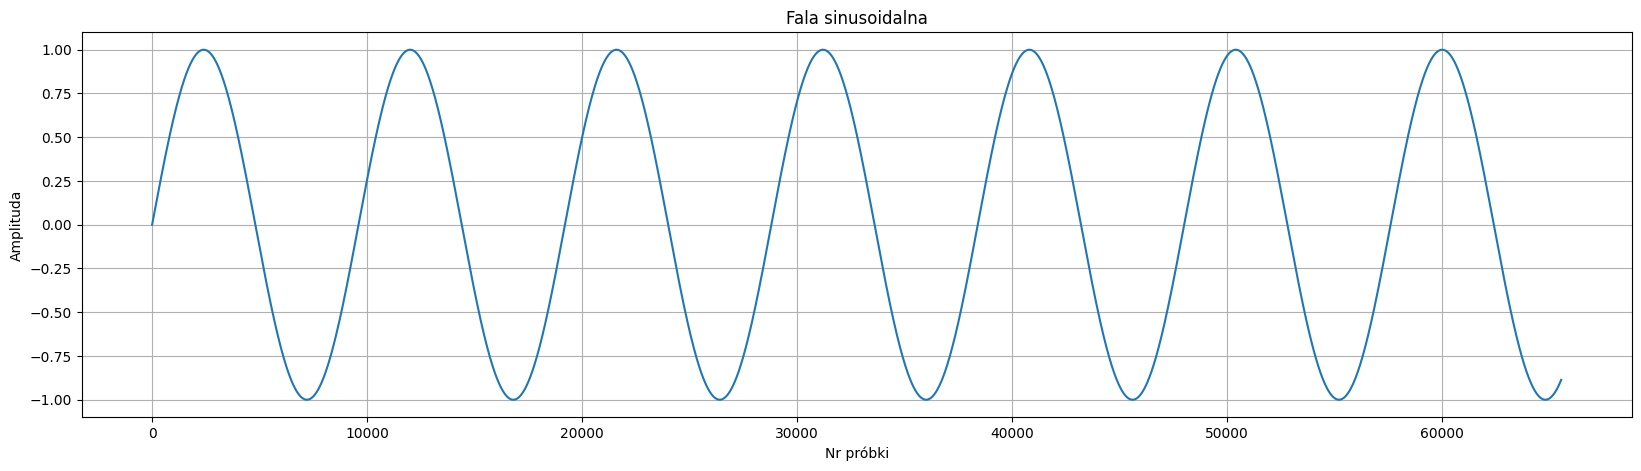

In [42]:
length = 65_536  
f = 50          
fs = 480_000
x = np.arange(length)                 
sin_val = np.sin(2 * np.pi * x * f / fs)    
plot.figure(figsize=(20,5))    
plot.plot(x, sin_val)                 
plot.xlabel('Nr próbki')       
plot.ylabel('Amplituda')        
plot.title('Fala sinusoidalna') 
plot.grid(True, which='both')   
plot.show()  

2. Wyznacz dyskretną transformatę Fouriera tego sygnału i przedstaw jego widmo amplitudowe na wykresie w zakresie częstotliwości [0, fs/2], gdzie fs oznacza częstotliwość próbkowania.


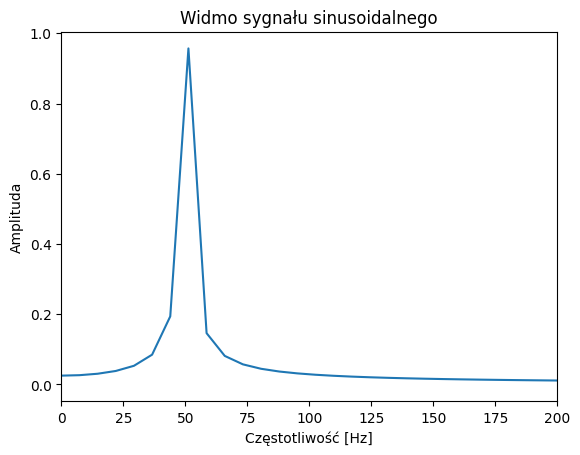

In [43]:
spectrum = np.abs(np.fft.rfft(sin_val)) / (length / 2)
T = 1 / fs
f = np.fft.rfftfreq(length, T) 
plot.plot(figsize=(20, 5))
plot.plot(f, spectrum)
plot.xlim(0, 200)
plot.xlabel('Częstotliwość [Hz]')
plot.ylabel('Amplituda')
plot.title('Widmo sygnału sinusoidalnego')
plot.show()

3. Wygeneruj ciąg próbek mieszaniny dwóch fal sinusoidalnych (tzn. ich kombinacji liniowej) o częstotliwościach 50 i 60 Hz. Wykonaj zadanie z punktu 2 dla tego sygnału.

In [44]:
def merged_sin(f1, f2, fs):
    length = 65_536                            
    x = np.arange(length)                     
    y = np.sin(2 * np.pi * x * f1 / fs ) + np.sin(2 * np.pi * x * f2 / fs )            
    spectrum2 = np.fft.rfft(y)                
    plot.figure(figsize = (17, 5))
    plot.subplot(1, 2, 1)
    plot.plot(x, y)
    plot.title('Kombinacja liniowa fal sinusoidalnych')
    plot.xlabel('Numer próbki')
    plot.ylabel('Amplituda')
    plot.subplot(1, 2, 2)
    plot.plot(f, np.abs(spectrum2) / (length/2))
    plot.xlim(0, 400)
    plot.title('Widmo fal sinusiodalnych')
    plot.xlabel('Częstotliwość [Hz]')
    plot.ylabel('Wartość')
    plot.show()

Wywołanie funkcji:

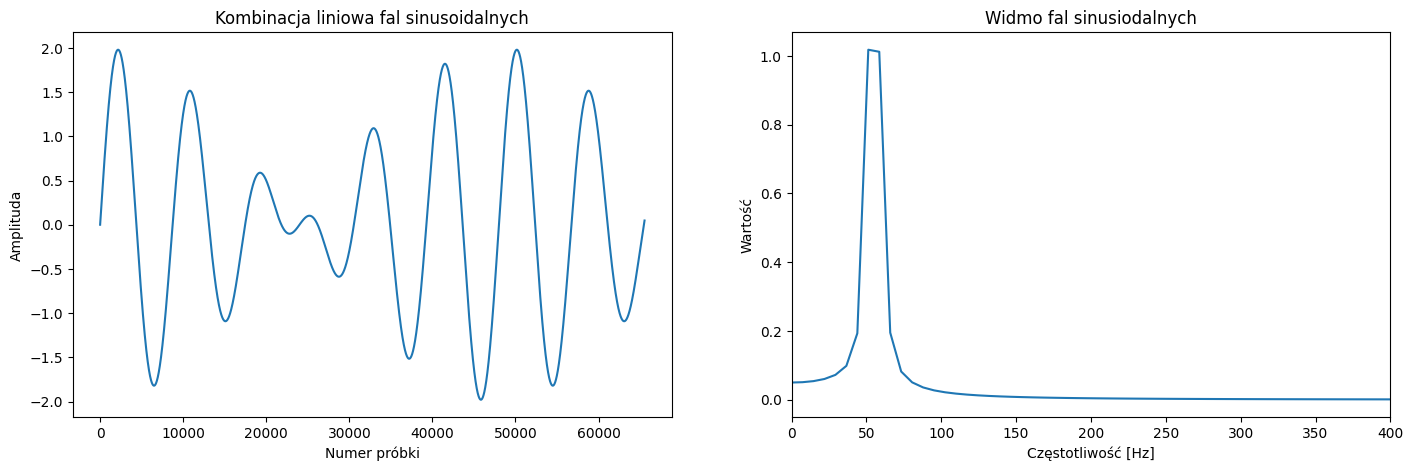

In [45]:
merged_sin(50, 60, 480_000)

4. Powtórz eksperymenty dla różnych czasów trwania sygnałów, tzn. dla różnych częstotliwości próbkowania.

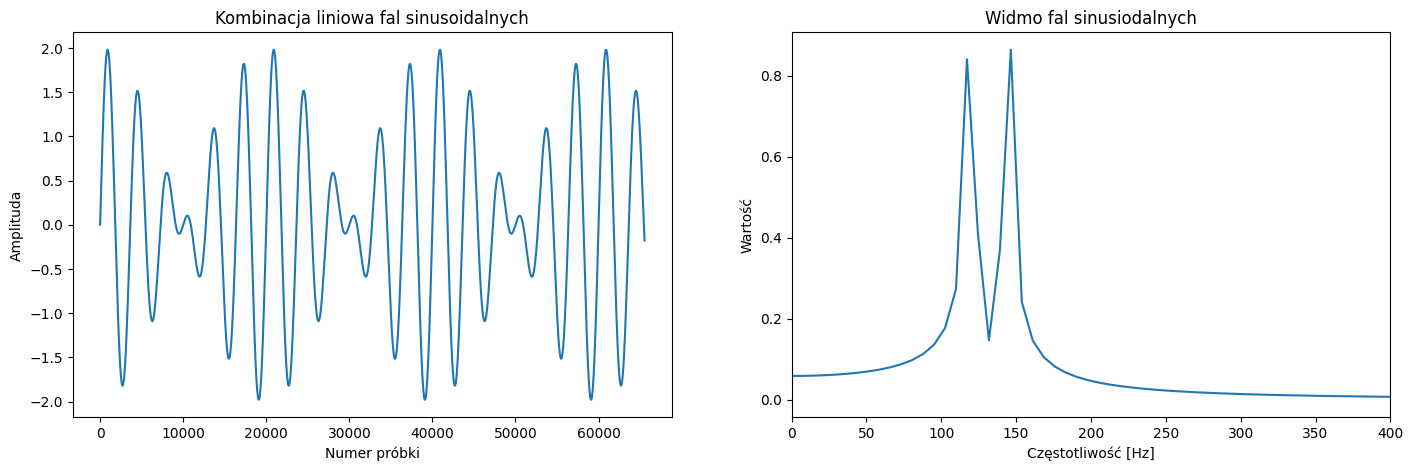

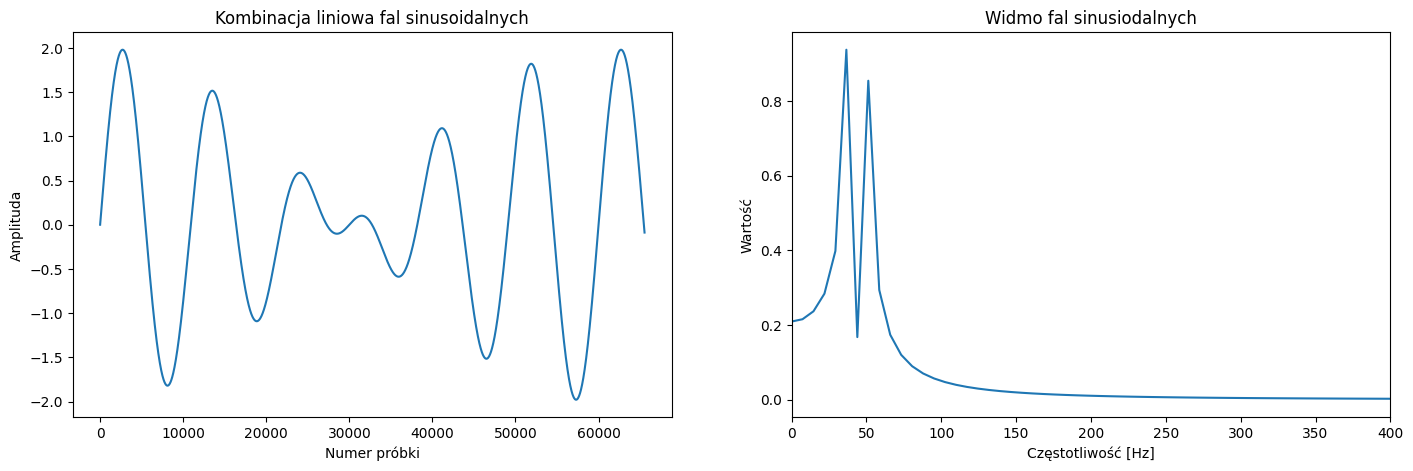

In [46]:
merged_sin(50,60,200_000)
merged_sin(50,60,600_000)

5. Wyznacz odwrotne transformaty Fouriera ciągów wyznaczonych w zadaniu 2 i porównaj z ciągami oryginalnymi

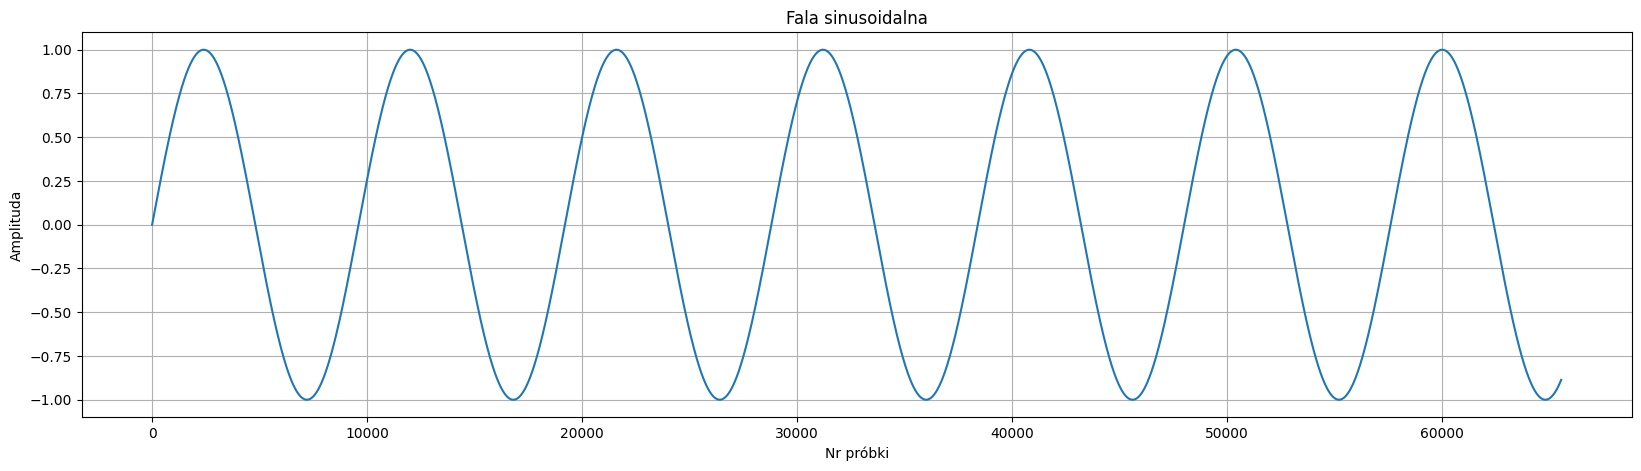

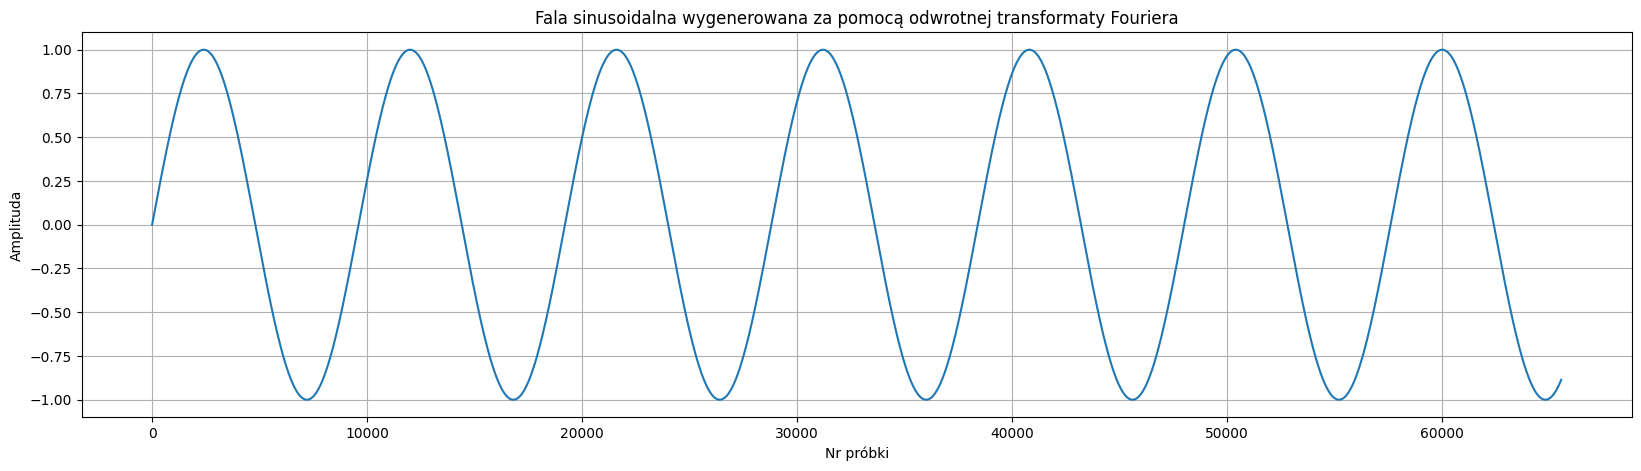

In [47]:
plot.figure(figsize=(20,5))    
plot.plot(x, sin_val)                 
plot.xlabel('Nr próbki')       
plot.ylabel('Amplituda')        
plot.title('Fala sinusoidalna') 
plot.grid(True, which='both') 

y = np.fft.rfft(sin_val)
x = np.real(np.fft.irfft(y))
plot.figure(figsize=(20,5))    
plot.plot(x)                 
plot.xlabel('Nr próbki')       
plot.ylabel('Amplituda')        
plot.title('Fala sinusoidalna wygenerowana za pomocą odwrotnej transformaty Fouriera') 
plot.grid(True, which='both') 

### Ćwiczenie 3
Celem ćwiczenia jest obserwacja widma sygnału EKG.
1. Wczytać sygnał ekg100.txt i ocenić go wizualnie na wykresie

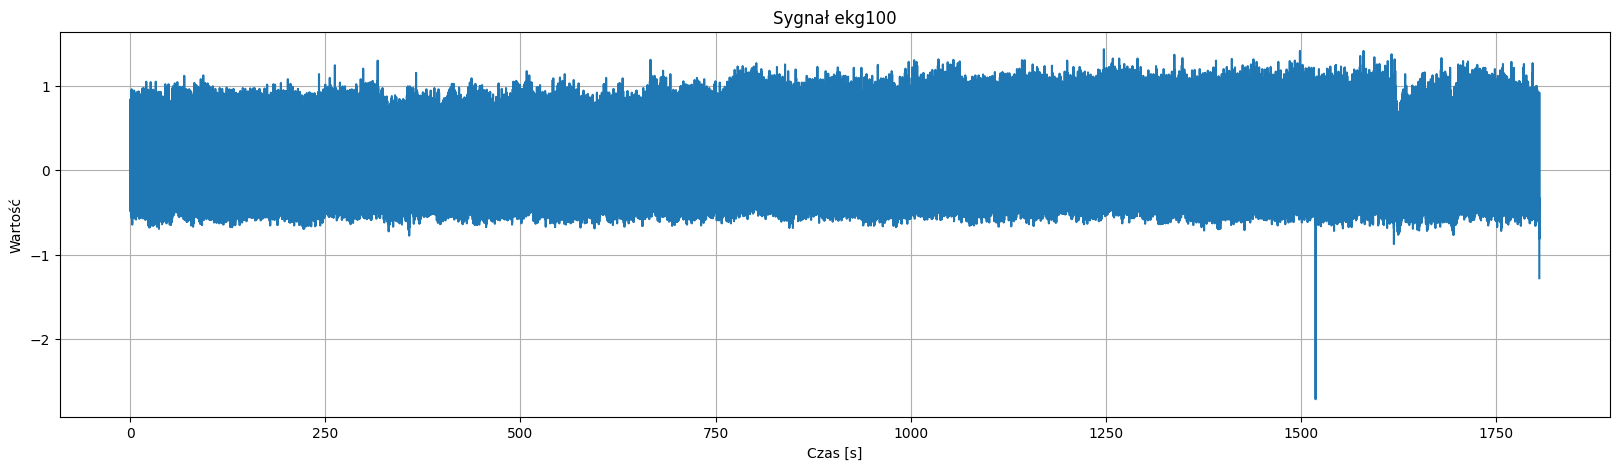

In [48]:
ekg100 =  pd.read_csv('ekg_signals/ekg100.txt', names = ['1'])
fs_ekg100 = 360
ekg100['time'] = ekg100.index / fs_ekg100
ekg100 = ekg100.set_index('time')
plot.figure(figsize=(20,5))
plot.plot(ekg100.index, ekg100['1'])
plot.title('Sygnał ekg100')
plot.xlabel('Czas [s]')
plot.ylabel('Wartość')
plot.grid(True, which='both')

Aby umożliwić przeanalizowanie sygnału ekg100 poniższy fragment kodu tworzy wykres dla pierwszych 3 sekund sygnału.

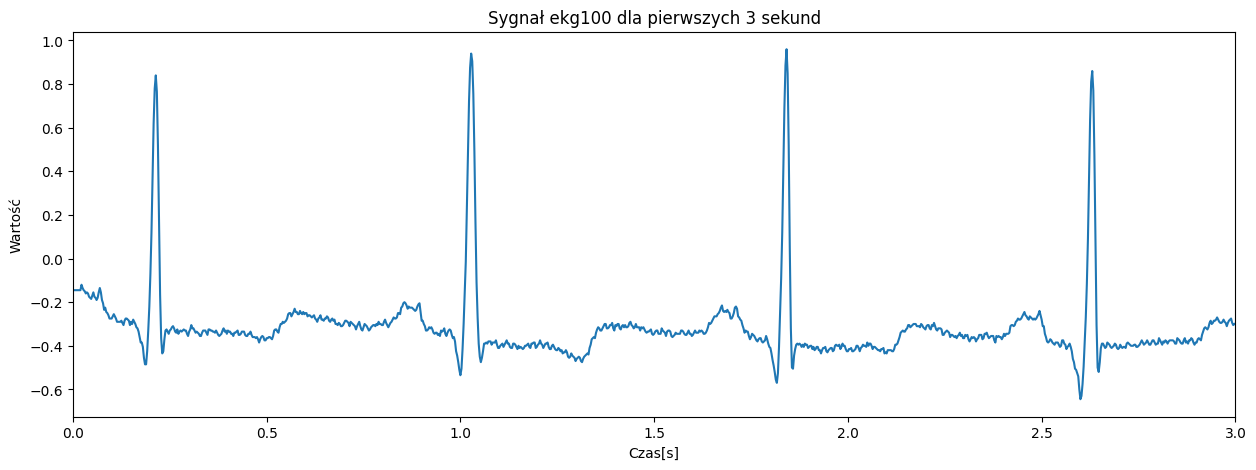

In [49]:

ekg100_5s = ekg100.head(1080).copy()
ekg100_5s['time'] = ekg100_5s.index / fs_ekg100
plot.figure(figsize=(15, 5))
plot.plot(ekg100_5s.index, ekg100_5s['1'])
plot.title('Sygnał ekg100 dla pierwszych 3 sekund')
plot.xlabel('Czas[s]')
plot.ylabel('Wartość')
plot.xlim(0,3)
plot.show()

2. Wyznaczyenie dyskretnej transformaty Fouriera i przedstawienie widma amplitudowego sygnału w funkcji częstotliwości w zakresie [0, fs/2], gdzie fs oznacza częstotliwość próbkowania.

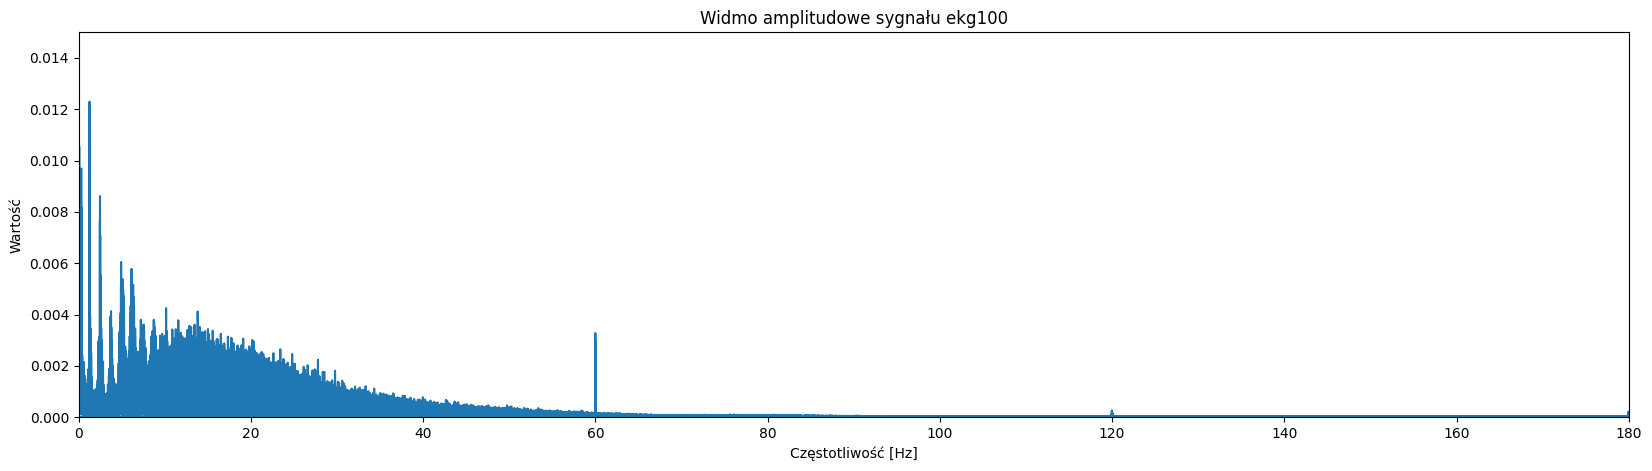

In [50]:
x = np.fft.fftfreq(ekg100.size, 1 / fs_ekg100)
y = np.abs(np.fft.fft(ekg100['1'])) / (ekg100.size // 2)
plot.figure(figsize=(20,5))
plot.plot(x, y)
plot.xlim(0, fs_ekg100 / 2)
plot.ylim(0,0.015)
plot.title('Widmo amplitudowe sygnału ekg100')
plot.xlabel('Częstotliwość [Hz]')
plot.ylabel('Wartość')
plot.show()

3. Wyznaczyć odwrotną dyskretną transformatę Fouriera ciągu wyznaczonego w punkcie 2 i porównać otrzymany ciąg próbek z pierwotnym sygnałem ekg100 (można wyznaczyć różnicę sygnałów).

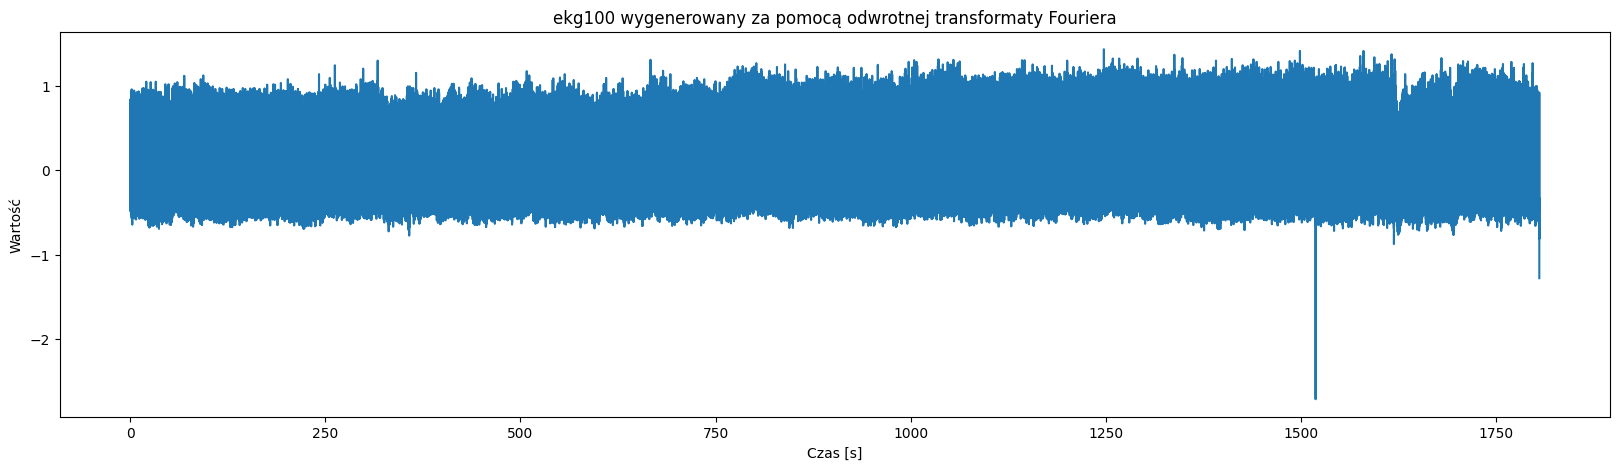

In [61]:
y = np.real(np.fft.ifft(np.fft.fft(ekg100['1'])))
plot.figure(figsize=(20,5))
plot.plot(ekg100.index, y)
plot.title('ekg100 wygenerowany za pomocą odwrotnej transformaty Fouriera')
plot.xlabel('Czas [s]')
plot.ylabel('Wartość')
plot.show()

### Ćwiczenie 4.
Celem ćwiczenia jest praktyczne wypróbowanie działania filtrów w celu wyeliminowania niepożądanych zakłóceń z sygnału EKG. Proszę wybrać rodzaj filtra do eksperymentowania, np. Butterwortha lub Czebyszewa. Do filtracji wykorzystać gotowe funkcje z biblioteki scipy.signal.
1. Wczytaj sygnał ekg noise.txt i zauważ zakłócenia nałożone na sygnał. Wykreślić częstotliwościową charakterystykę amplitudową sygnału.

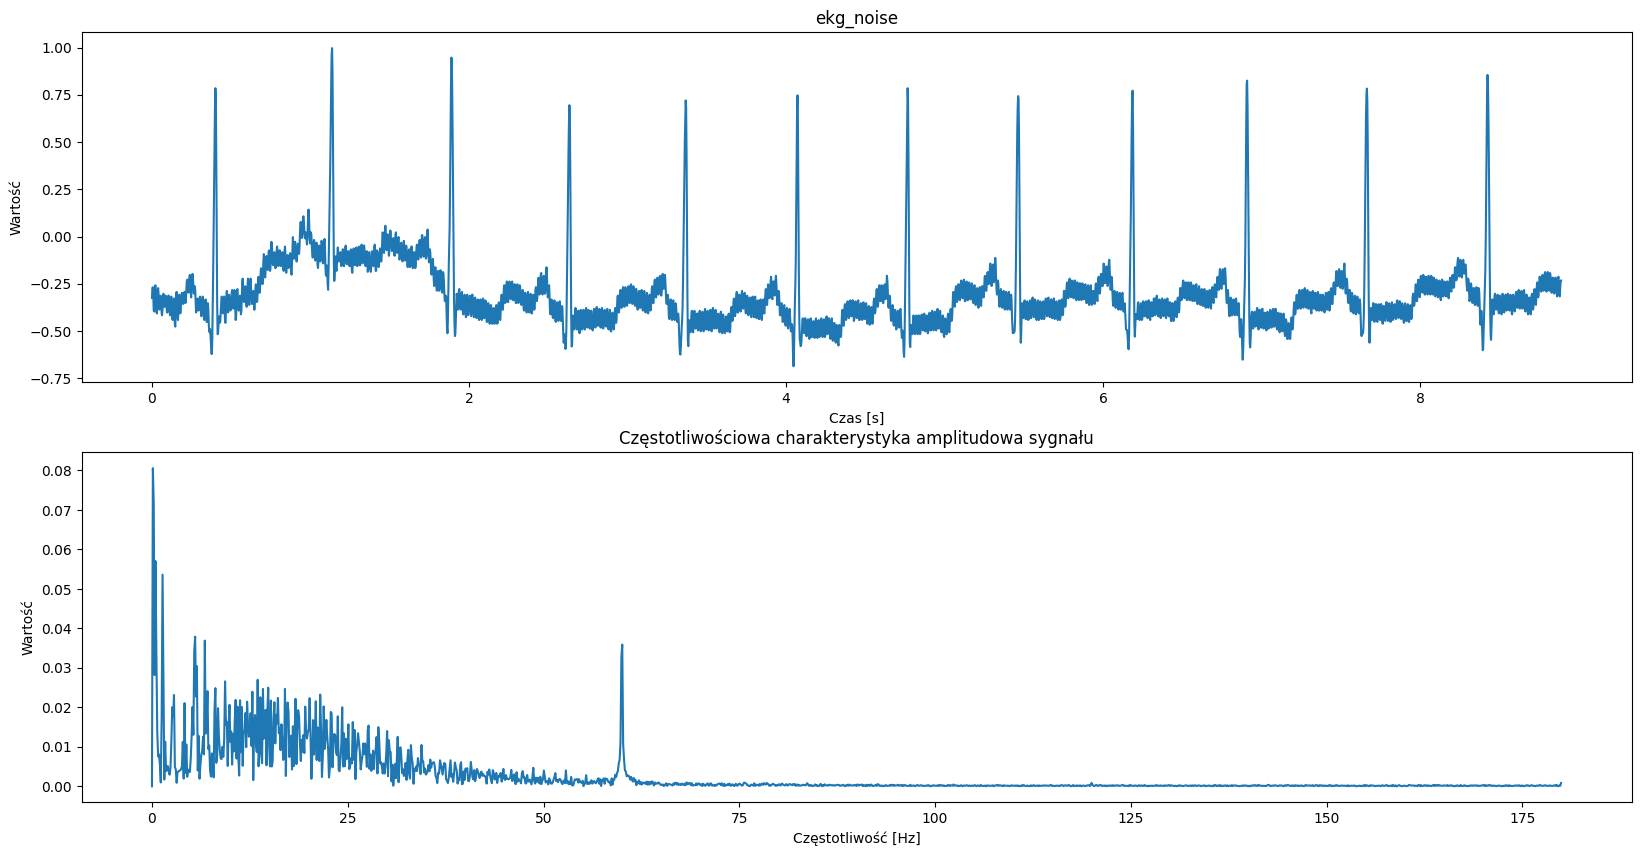

In [123]:
ekg_noise = pd.read_csv('ekg_signals/ekg_noise.txt', names = ['time', '1'], sep = '\s+', index_col = 0)
y = np.abs(np.fft.rfft(ekg_noise['1'] - ekg_noise['1'].mean())) / (ekg_noise['1'].size // 2)
x = np.fft.rfftfreq(ekg_noise.size, 1 / fs_noise) 
plot.figure(figsize=(20,10))
plot.subplot(2, 1, 1) 
plot.plot(ekg_noise)
plot.title('ekg_noise')
plot.xlabel('Czas [s]')
plot.ylabel('Wartość')
plot.subplot(2, 1, 2)
plot.plot(x, y) 
plot.title('Częstotliwościowa charakterystyka amplitudowa sygnału')
plot.xlabel('Częstotliwość [Hz]')
plot.ylabel('Wartość')
plot.show()

2. Zbadaj filtr dolnoprzepustowy o częstotliwości granicznej 60 Hz w celu redukcji zakłóceń pochodzących z sieci zasilającej. Wyznacz parametry filtra, wykreśl jego charakterystykę (zależność tłumienia od częstotliwości), przebieg sygnału po filtracji oraz jego widmo. Można też wyznaczyć różnicę między sygnałem przed i po filtracji i widmo tej różnicy.

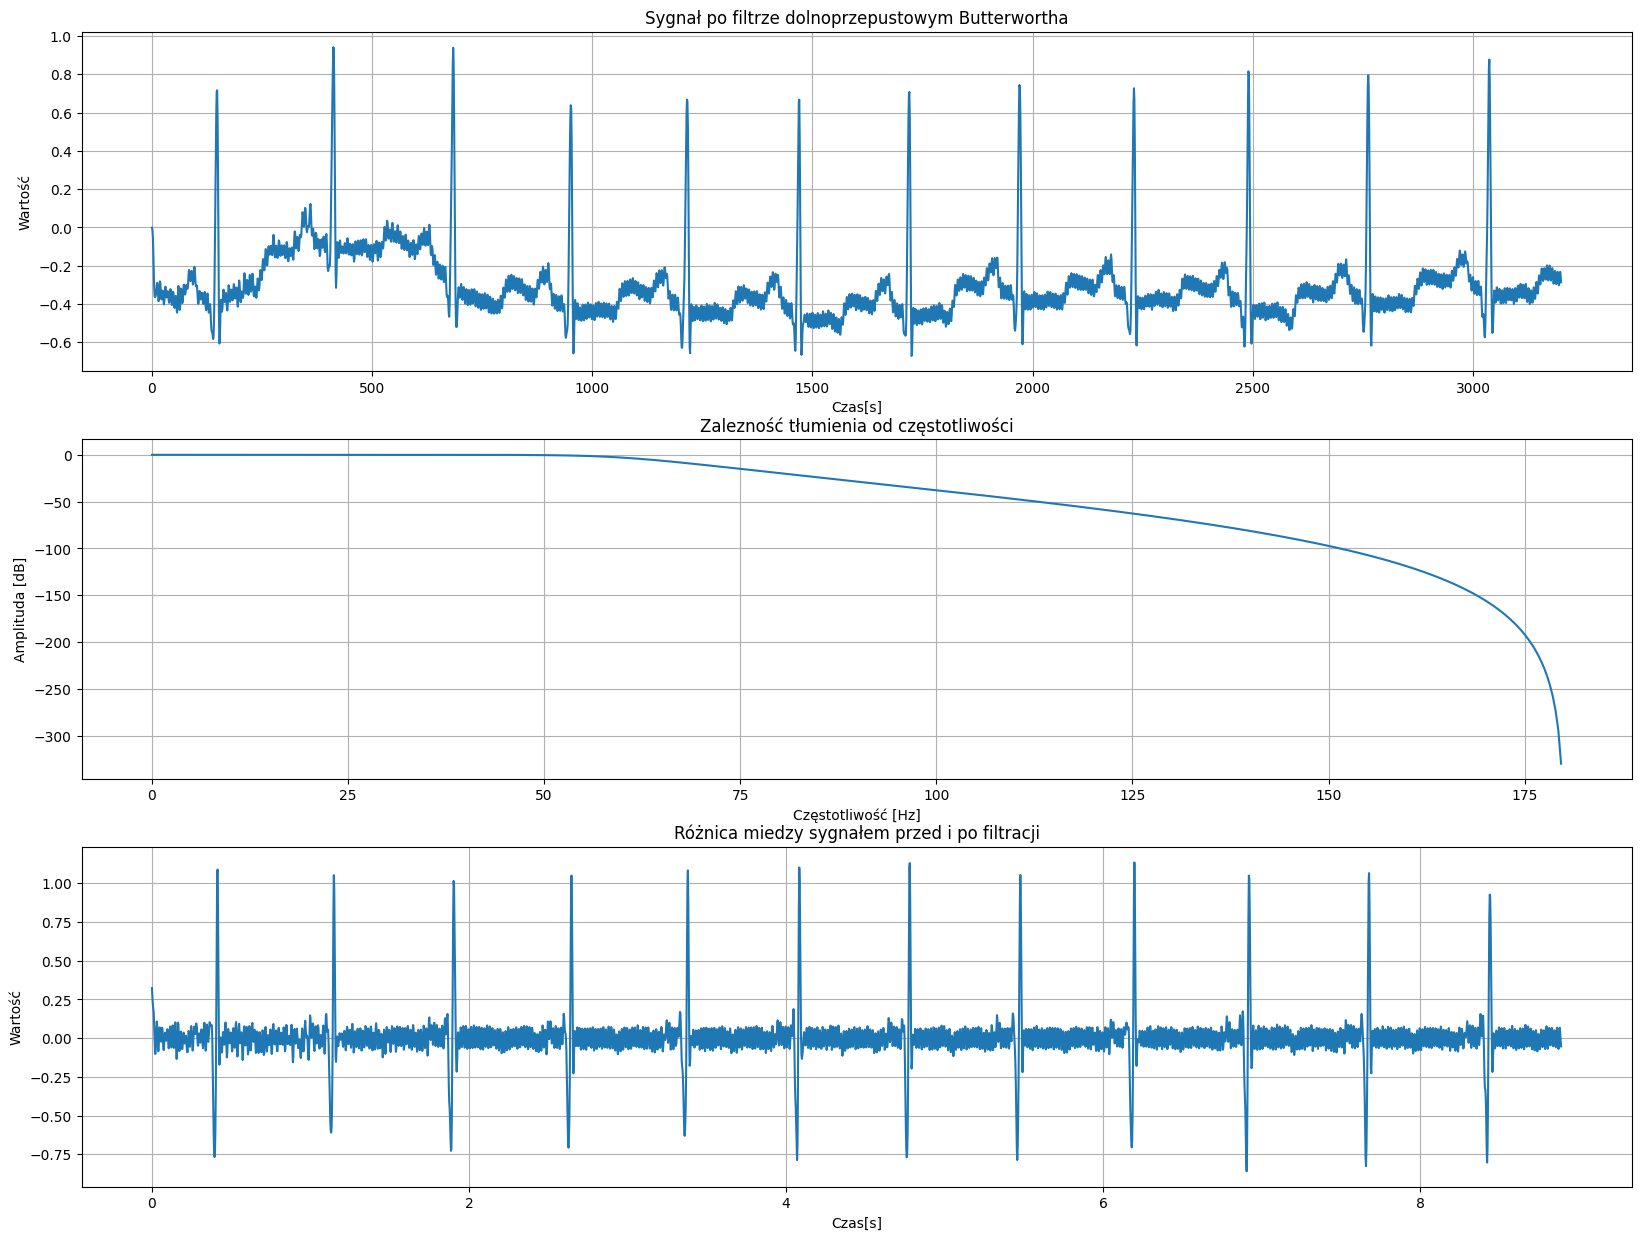

In [136]:
frequency_bound = 60 

butterworth_filter  = sig.butter(6, frequency_bound, 'low', output = 'sos', fs = fs_noise ) 
filtered  = sig.sosfilt(butterworth_filter, ekg_noise['1']) 
plot.figure(figsize=(20, 15))

plot.subplot(3, 1, 1) 
plot.plot(filtered )
plot.title('Sygnał po filtrze dolnoprzepustowym Butterwortha')
plot.xlabel('Czas[s]')
plot.ylabel('Wartość')
plot.grid(True)

b, a = sig.butter(6,frequency_bound/(fs_noise / 2), 'low')
w, h = sig.freqz(b, a) 
x = w * fs_noise / (2 * np.pi)
y = 20 * np.log10(abs(h))

plot.subplot(3, 1, 2) 
plot.plot(x,y)
plot.title('Zalezność tłumienia od częstotliwości')
plot.xlabel('Częstotliwość [Hz]')
plot.ylabel('Amplituda [dB]')
plot.grid(True)

plot.subplot(3, 1, 3)
plot.plot(filtered - ekg_noise['1'])
plot.title('Różnica miedzy sygnałem przed i po filtracji')
plot.xlabel('Czas[s]')
plot.ylabel('Wartość')
plot.grid(True)
plot.show()

3. Zastosuj następnie, do sygnału otrzymanego w punkcie 2, filtr górnoprzepustowy o częstotliwości granicznej 5 Hz w celu eliminacji pływania linii izoelektrycznej. Sporządź wykresy sygnałów jak w punkcie 2.

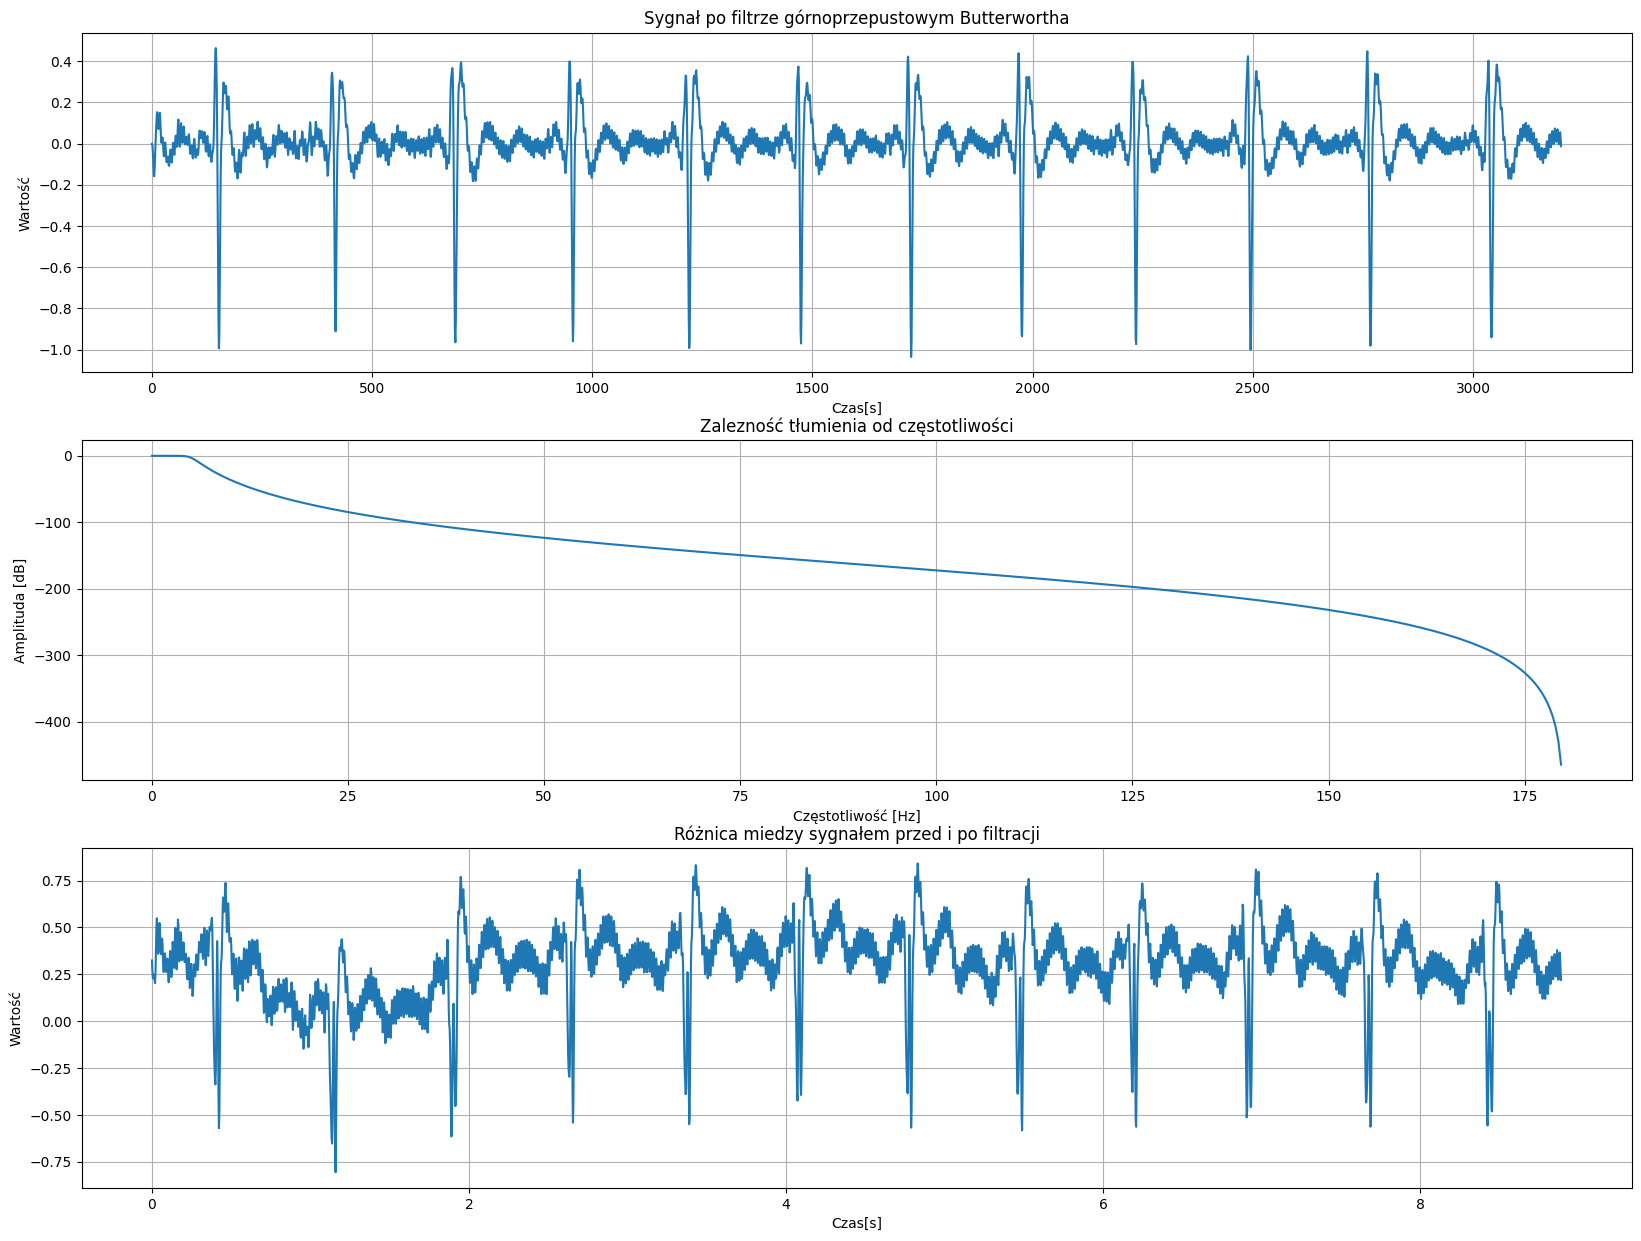

In [138]:
frequency_bound = 5  
butterworth  = sig.butter(6, frequency_bound, 'high', output = 'sos', fs = fs_noise) 
filtered_2 = sig.sosfilt(butterworth, filtered) 

plot.figure(figsize=(20,15))
plot.subplot(3, 1, 1)  
plot.plot(filtered_2)
plot.title('Sygnał po filtrze górnoprzepustowym Butterwortha')
plot.xlabel('Czas[s]')
plot.ylabel('Wartość')
plot.grid(True)

b, a = sig.butter(6,frequency_bound/(fs_noise / 2), 'low') 
w, h = sig.freqz(b, a) 
x = w * fs_noise / (2 * np.pi)
y = 20 * np.log10(abs(h))

plot.subplot(3, 1, 2) 
plot.plot(x, y)
plot.title('Zalezność tłumienia od częstotliwości')
plot.xlabel('Częstotliwość [Hz]')
plot.ylabel('Amplituda [dB]')
plot.grid(True)

plot.subplot(3, 1, 3)  
plot.plot(filtered_2 - ekg_noise['1'])
plot.title('Różnica miedzy sygnałem przed i po filtracji')
plot.xlabel('Czas[s]')
plot.ylabel('Wartość')
plot.grid(True)
plot.show()